# Final Project - Rachel Livingston
## A CSAT Classification Problem

### Project Summary:
This project is a classification problem with customer support tickets to see if I can predict if a support ticket will be rated good (1) or bad (0). The business question is that if we can proactively prediect a bad csat score, we can give those tickets more love and try to turn them into a positive rating instead. 

### Project Dataset:
24,552 support tickets with a satisfaction rating from 2019 YTD. The features selected are the features our contact management system allows us to route or flag tickets so we can action on the tickets.

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




In [2]:
# Load data
df = pd.read_csv('data/case study combined.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24552 entries, 0 to 24551
Data columns (total 17 columns):
ticket id                24552 non-null int64
customer type            24267 non-null object
hour ticket created      24552 non-null int64
created date             24552 non-null object
solved date              24552 non-null object
agent wait time          24552 non-null float64
assign time              24552 non-null float64
first reply time         24552 non-null float64
first resolution time    24552 non-null float64
full resolution time     24552 non-null float64
private comments         24552 non-null int64
public comments          24552 non-null int64
agent stations           24552 non-null int64
reopens                  24552 non-null int64
replies                  24552 non-null int64
satisfaction             24552 non-null int64
Wrap Up Code             24552 non-null object
dtypes: float64(5), int64(8), object(4)
memory usage: 3.2+ MB


In [3]:
# Explore data
df.head()

,ticket id,customer type,hour ticket created,created date,solved date,agent wait time,assign time,first reply time,first resolution time,full resolution time,private comments,public comments,agent stations,reopens,replies,satisfaction,Wrap Up Code
0,803178,Couple,17,08/13/2019,09/04/2019,14.0,0.0,28430.0,31536.0,31572.0,4,7,1,1,3,1,Proactive Outreach
1,732468,Guest,16,06/14/2019,06/27/2019,2.0,0.0,18527.0,18527.0,18527.0,10,2,1,0,1,1,Registry
2,705148,Couple,17,05/22/2019,06/04/2019,0.0,0.0,17190.0,14326.0,18738.0,4,6,1,3,2,1,Registry
3,611418,Couple,13,02/15/2019,02/25/2019,0.0,0.0,14523.0,0.0,14523.0,6,2,1,2,1,0,Registry
4,619896,Guest,13,02/26/2019,03/07/2019,0.0,0.0,12933.0,8730.0,13411.0,5,4,1,2,2,0,Registry


In [4]:
df.tail()

,ticket id,customer type,hour ticket created,created date,solved date,agent wait time,assign time,first reply time,first resolution time,full resolution time,private comments,public comments,agent stations,reopens,replies,satisfaction,Wrap Up Code
24547,819639,NaN,7,08/28/2019,08/28/2019,0.0,13.0,0.0,13.0,13.0,0,1,1,0,0,0,Miscellaneous
24548,819703,Guest,9,08/28/2019,08/28/2019,0.0,83.0,0.0,83.0,83.0,0,1,1,0,0,0,Miscellaneous
24549,824950,Couple,16,09/02/2019,09/02/2019,0.0,0.0,0.0,0.0,0.0,1,1,1,0,0,0,Registry
24550,825973,Guest,13,09/03/2019,09/03/2019,0.0,0.0,0.0,0.0,0.0,1,1,1,0,0,0,Registry
24551,826477,Couple,17,09/03/2019,09/03/2019,0.0,0.0,0.0,0.0,0.0,0,1,1,0,0,0,Registry


In [5]:
# Rename one or more columns to remove spaces
df.rename(columns={'ticket id':'ticket_id', 'customer type':'customer_type', 'hour ticket created':'hour_ticket_created'}, inplace = True);

In [6]:
df.rename(columns={'created date':'created_date', 'solved date':'solved_date', 'agent wait time':'agent_wait_time'}, inplace = True);

In [7]:
df.rename(columns={'assign time':'assign_time', 'first reply time':'first_reply_time', 'first resolution time':'first_resolution_time'}, inplace = True);

In [8]:
df.rename(columns={'private comments':'private comments', 'public comments':'public_comments', 'agent stations':'agent_stations'}, inplace = True);

In [9]:
df.rename(columns={'Wrap Up Code':'wrap_up_code','full resolution time':'full_resolution_time', 'private comments':'private_comments'}, inplace = True);

In [10]:
df.columns

Index(['ticket_id', 'customer_type', 'hour_ticket_created', 'created_date',
       'solved_date', 'agent_wait_time', 'assign_time', 'first_reply_time',
       'first_resolution_time', 'full_resolution_time', 'private_comments',
       'public_comments', 'agent_stations', 'reopens', 'replies',
       'satisfaction', 'wrap_up_code'],
      dtype='object')

In [11]:
# Clean up date datatypes
from datetime import datetime
df['created_date'] = pd.to_datetime(df.created_date)

In [12]:
df['solved_date'] = pd.to_datetime(df.solved_date)

ticket_id                  0
customer_type            285
hour_ticket_created        0
created_date               0
solved_date                0
agent_wait_time            0
assign_time                0
first_reply_time           0
first_resolution_time      0
full_resolution_time       0
private_comments           0
public_comments            0
agent_stations             0
reopens                    0
replies                    0
satisfaction               0
wrap_up_code               0
dtype: int64


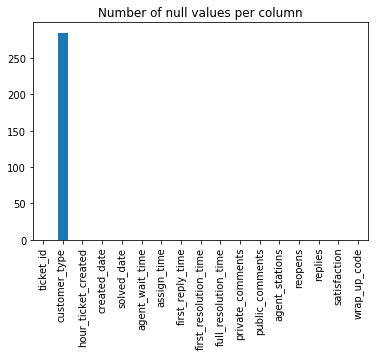

In [13]:
# Count the missing values in each column
print((df.isnull().sum()))

df.isnull().sum().plot(kind='bar');
plt.title('Number of null values per column');

In [14]:
# get rid of N/A values in customer type, it is a tiny number and can be ignored
df.dropna(inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24267 entries, 0 to 24551
Data columns (total 17 columns):
ticket_id                24267 non-null int64
customer_type            24267 non-null object
hour_ticket_created      24267 non-null int64
created_date             24267 non-null datetime64[ns]
solved_date              24267 non-null datetime64[ns]
agent_wait_time          24267 non-null float64
assign_time              24267 non-null float64
first_reply_time         24267 non-null float64
first_resolution_time    24267 non-null float64
full_resolution_time     24267 non-null float64
private_comments         24267 non-null int64
public_comments          24267 non-null int64
agent_stations           24267 non-null int64
reopens                  24267 non-null int64
replies                  24267 non-null int64
satisfaction             24267 non-null int64
wrap_up_code             24267 non-null object
dtypes: datetime64[ns](2), float64(5), int64(8), object(2)
memory usage: 3.3+ M

In [16]:
df.describe(include='all')

,ticket_id,customer_type,hour_ticket_created,created_date,solved_date,agent_wait_time,assign_time,first_reply_time,first_resolution_time,full_resolution_time,private_comments,public_comments,agent_stations,reopens,replies,satisfaction,wrap_up_code
count,24267.000000,24267,24267.000000,24267,24267,24267.000000,24267.000000,24267.000000,24267.000000,24267.000000,24267.000000,24267.000000,24267.000000,24267.000000,24267.000000,24267.000000,24267
unique,NaN,2,NaN,248,247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12
top,NaN,Couple,NaN,2019-06-11 00:00:00,2019-06-13 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Registry
freq,NaN,13060,NaN,186,237,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18251
first,NaN,NaN,NaN,2019-01-01 00:00:00,2019-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2019-09-05 00:00:00,2019-09-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,704497.731405,NaN,14.243747,NaN,NaN,136.576709,428.262332,543.621296,824.703795,1473.993942,0.634730,3.365888,1.035521,0.669345,1.521902,0.923765,NaN
std,73279.517176,NaN,5.069862,NaN,NaN,653.098835,537.678539,825.976101,1595.970845,2434.881291,1.403864,2.178511,0.211686,0.890781,1.145931,0.265380,NaN
min,579891.000000,NaN,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,NaN
25%,640293.000000,NaN,11.000000,NaN,NaN,0.000000,8.000000,23.000000,25.000000,83.000000,0.000000,2.000000,1.000000,0.000000,1.000000,1.000000,NaN


In [17]:
# Convert any non-numeric attributes to numbers with getdummies
df = pd.get_dummies(df, columns=['customer_type', 'wrap_up_code'], drop_first=True)

In [18]:
df.dtypes

ticket_id                                   int64
hour_ticket_created                         int64
created_date                       datetime64[ns]
solved_date                        datetime64[ns]
agent_wait_time                           float64
assign_time                               float64
first_reply_time                          float64
first_resolution_time                     float64
full_resolution_time                      float64
private_comments                            int64
public_comments                             int64
agent_stations                              int64
reopens                                     int64
replies                                     int64
satisfaction                                int64
customer_type_Guest                         uint8
wrap_up_code_Hot Topic                      uint8
wrap_up_code_Invitations                    uint8
wrap_up_code_Legal/Copyright                uint8
wrap_up_code_Miscellaneous                  uint8


In [19]:
#set ticket_id as index
df.set_index('ticket_id', inplace=True)

In [20]:
df.columns

Index(['hour_ticket_created', 'created_date', 'solved_date', 'agent_wait_time',
       'assign_time', 'first_reply_time', 'first_resolution_time',
       'full_resolution_time', 'private_comments', 'public_comments',
       'agent_stations', 'reopens', 'replies', 'satisfaction',
       'customer_type_Guest', 'wrap_up_code_Hot Topic',
       'wrap_up_code_Invitations', 'wrap_up_code_Legal/Copyright',
       'wrap_up_code_Miscellaneous', 'wrap_up_code_Proactive Emails',
       'wrap_up_code_Proactive Outreach', 'wrap_up_code_Real Weddings',
       'wrap_up_code_Registry', 'wrap_up_code_Registry Advisor',
       'wrap_up_code_Tech Issues', 'wrap_up_code_Weddings'],
      dtype='object')

# EDA

In [21]:
# Look at correlation... even though this isn't a linear regression, it is classification
corr = df.corr()

In [22]:
corr['satisfaction']

hour_ticket_created               -0.004198
agent_wait_time                   -0.143335
assign_time                       -0.029197
first_reply_time                  -0.054476
first_resolution_time             -0.039766
full_resolution_time              -0.287666
private_comments                  -0.163681
public_comments                   -0.123894
agent_stations                    -0.053026
reopens                           -0.247668
replies                           -0.172029
satisfaction                       1.000000
customer_type_Guest                0.027213
wrap_up_code_Hot Topic             0.012816
wrap_up_code_Invitations          -0.034876
wrap_up_code_Legal/Copyright      -0.039153
wrap_up_code_Miscellaneous        -0.010533
wrap_up_code_Proactive Emails     -0.008033
wrap_up_code_Proactive Outreach    0.007144
wrap_up_code_Real Weddings        -0.016383
wrap_up_code_Registry              0.065943
wrap_up_code_Registry Advisor     -0.004880
wrap_up_code_Tech Issues        

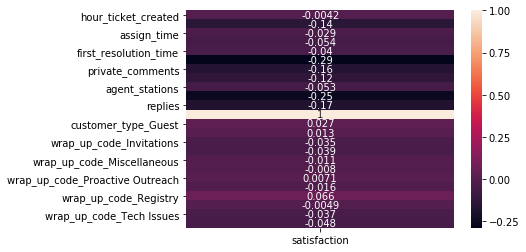

In [23]:
sns.heatmap(corr[['satisfaction']], annot=True)

Granted correlation is for linear regression, it looks like the following metrics have the largest impact on 
satisfaction

-agent_wait_time 
-full_resolution_time
-private_comments
-public_comments
-reopens 
-replies 

In [24]:
# plot the data to see some initial insights
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12, 12)
plt.rcParams['font.size'] = 10

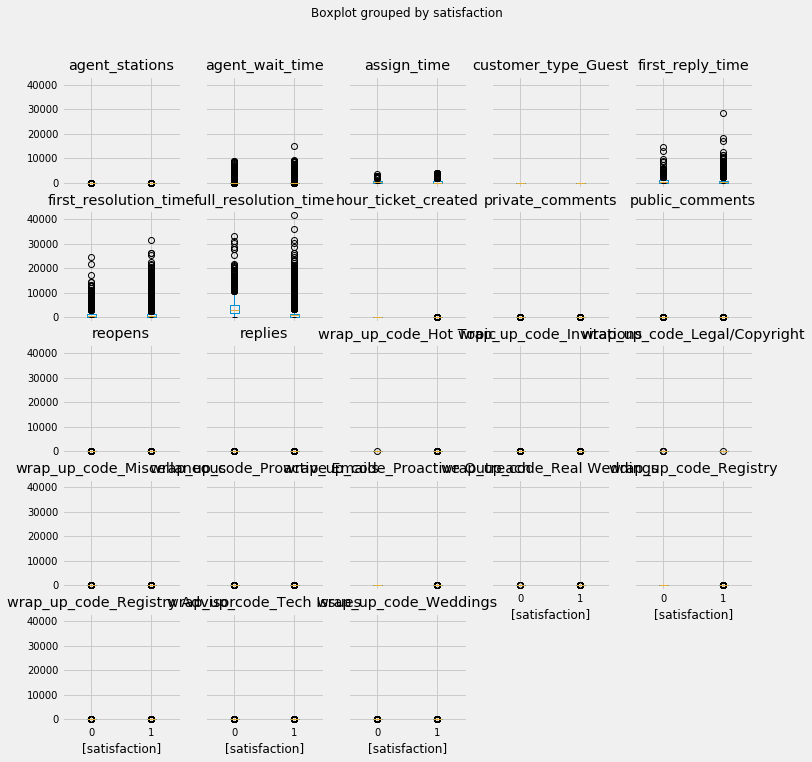

In [25]:
df.boxplot(by='satisfaction');

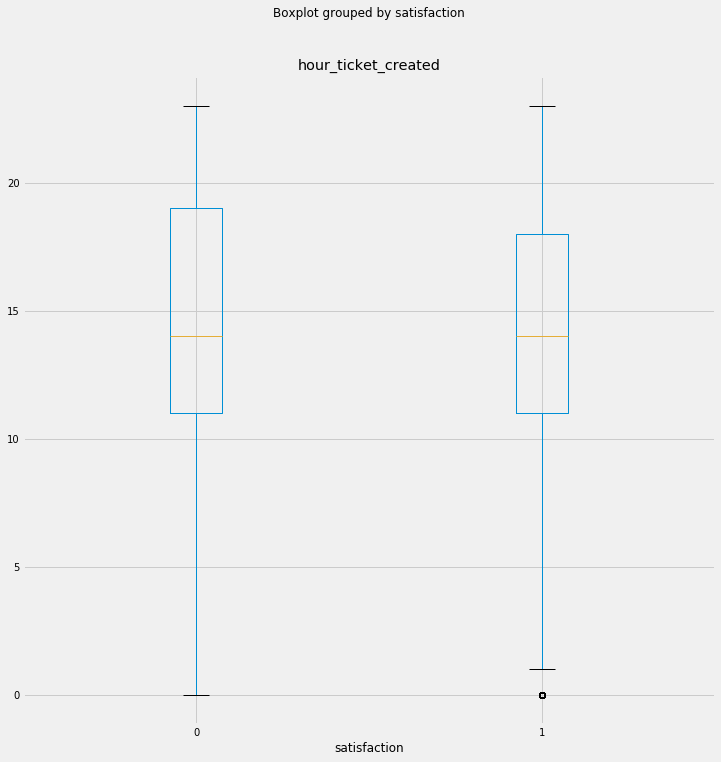

In [26]:
#look at boxplot of hour_ticket_created
df.boxplot(column=['hour_ticket_created'],by='satisfaction')

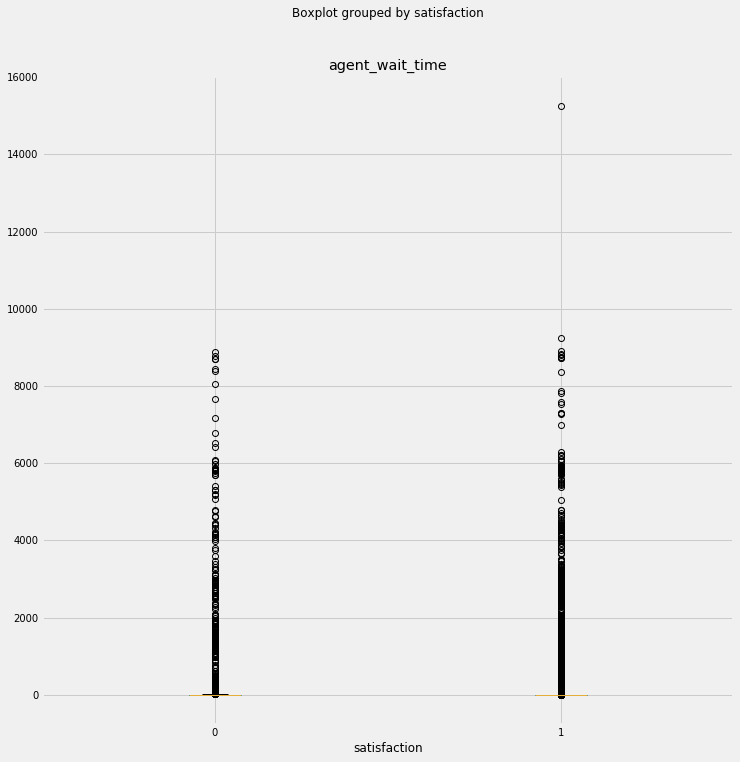

In [27]:
#look at boxplot of agent_wait_time
df.boxplot(column=['agent_wait_time'],by='satisfaction')

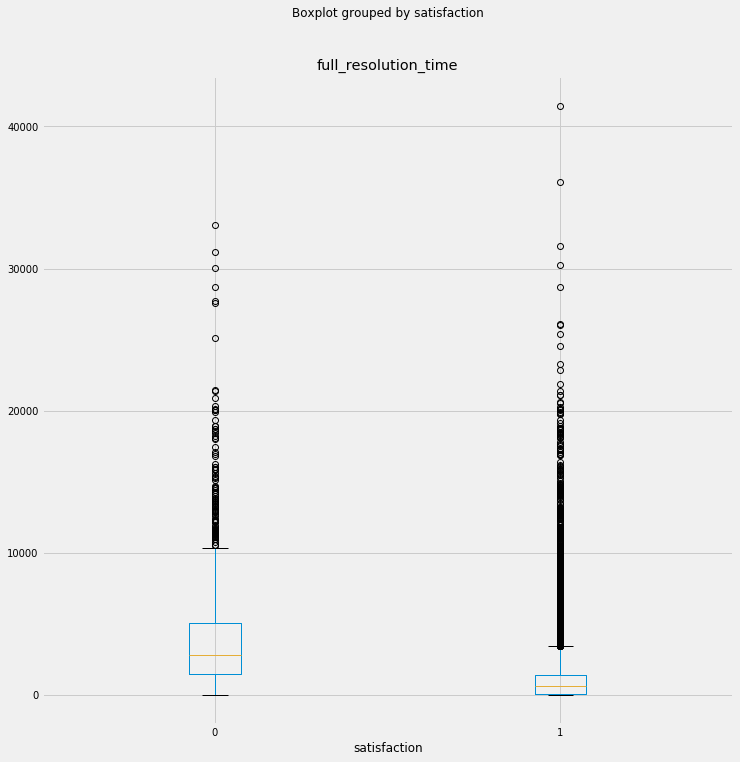

In [28]:
#look at boxplot of full_resolution_time
df.boxplot(column=['full_resolution_time'],by='satisfaction')

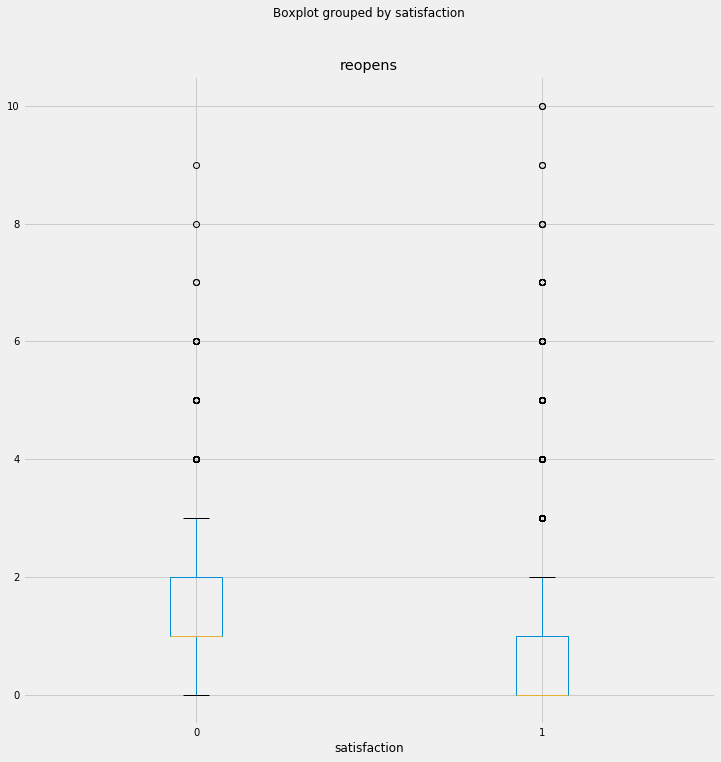

In [29]:
#look at boxplot of reopens
df.boxplot(column=['reopens'],by='satisfaction')

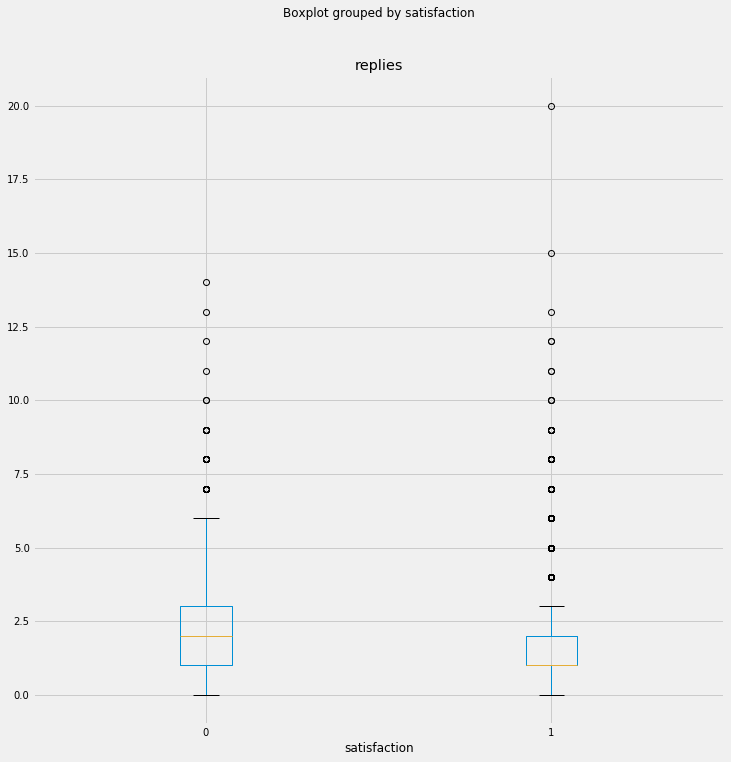

In [30]:
#look at boxplot of replies
df.boxplot(column=['replies'],by='satisfaction')

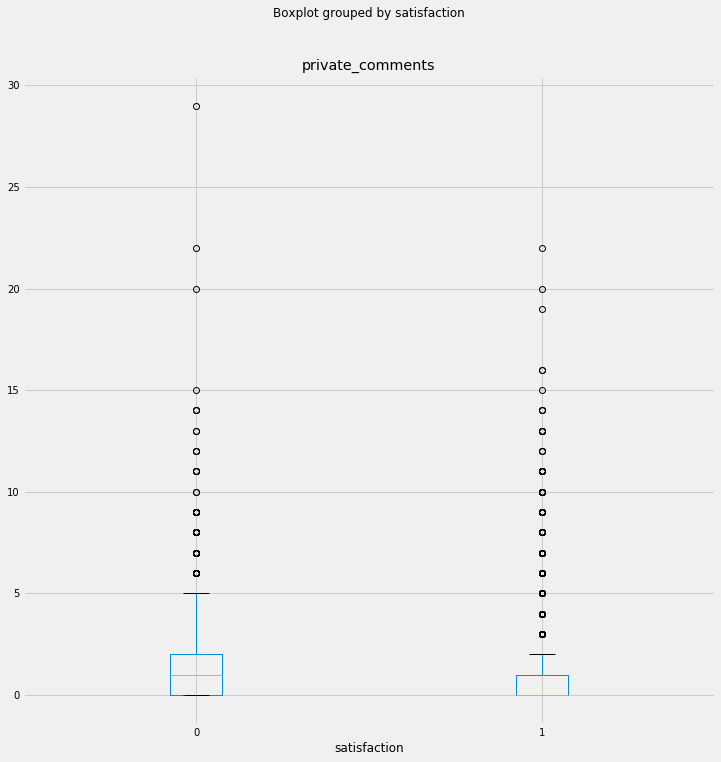

In [31]:
#look at boxplot of private_comments
df.boxplot(column=['private_comments'],by='satisfaction')

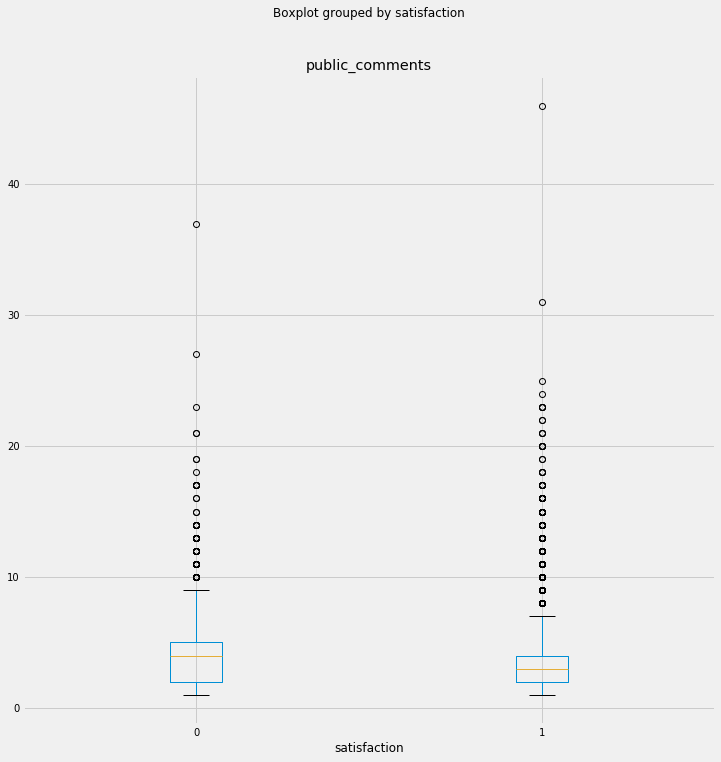

In [32]:
#look at boxplot of fpublic_comments
df.boxplot(column=['public_comments'],by='satisfaction')

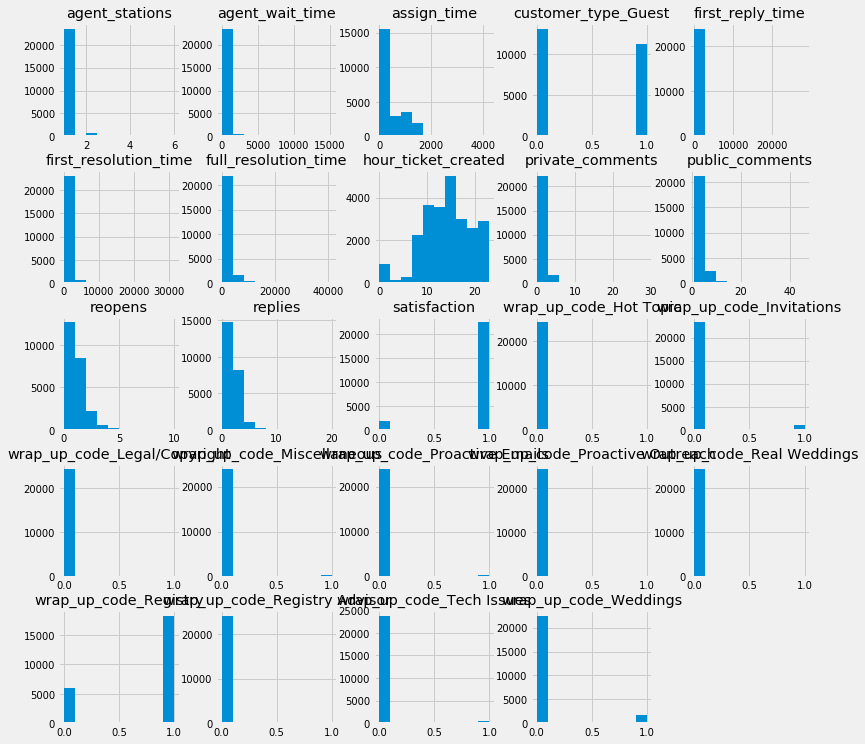

In [33]:
df.hist();

# Test/Train Split

In [35]:
# divide the data using our train, test, split

from sklearn.model_selection import train_test_split

X = df.drop(columns=['satisfaction','created_date','solved_date'])
y = df['satisfaction'].astype(np.int)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 24)

# Decision Tree to look for feature importance

## To do - make all cv's 5

In [36]:
#lets do a tree model first before we scale the data

In [37]:
# Instantiate a DecisionTreeClassifier (with random_state=1).
from sklearn.tree import DecisionTreeClassifier

feature_cols = X.columns
treeclf = DecisionTreeClassifier(max_depth=3, random_state=1)
treeclf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [38]:
# 
from sklearn.model_selection import cross_val_score
scores = cross_val_score(treeclf, X_train, y_train,cv=3, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

0.2651971205961063

In [39]:
treeclf.fit(X_train,y_train)
treeclf.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.25441809,
       0.57307675, 0.01486997, 0.12449249, 0.        , 0.03314271,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

In [40]:
for feat, importance in zip(X_train.columns, treeclf.feature_importances_):
    print(feat, importance)

hour_ticket_created 0.0
agent_wait_time 0.0
assign_time 0.0
first_reply_time 0.0
first_resolution_time 0.25441808559611967
full_resolution_time 0.5730767477301014
private_comments 0.014869965611961853
public_comments 0.1244924912513215
agent_stations 0.0
reopens 0.03314270981049548
replies 0.0
customer_type_Guest 0.0
wrap_up_code_Hot Topic 0.0
wrap_up_code_Invitations 0.0
wrap_up_code_Legal/Copyright 0.0
wrap_up_code_Miscellaneous 0.0
wrap_up_code_Proactive Emails 0.0
wrap_up_code_Proactive Outreach 0.0
wrap_up_code_Real Weddings 0.0
wrap_up_code_Registry 0.0
wrap_up_code_Registry Advisor 0.0
wrap_up_code_Tech Issues 0.0
wrap_up_code_Weddings 0.0


In [41]:
# List of values to try:
max_depth_range = list(range(1, 12))

# List to store the average RMSE for each value of max_depth:
RMSE_scores = []

# Use 
for depth in max_depth_range:
    treeclf = DecisionTreeClassifier(max_depth=depth, random_state=1)
    MSE_scores = cross_val_score(treeclf, X_train, y_train, cv=3, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

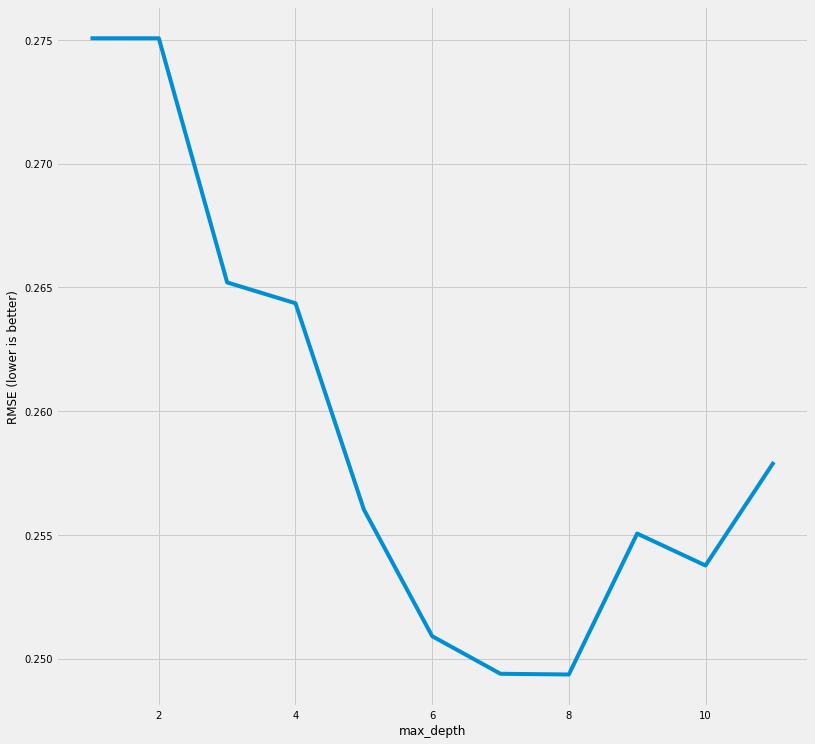

In [42]:
# Plot max_depth (x-axis) versus RMSE (y-axis).
plt.plot(max_depth_range, RMSE_scores);
plt.xlabel('max_depth');
plt.ylabel('RMSE (lower is better)');

In [43]:
# max_depth=8 was best, so fit a tree using that parameter.
treeclf = DecisionTreeClassifier(max_depth=7, random_state=1)
treeclf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [44]:
# Use fitted model to make predictions on testing data.
y_pred_tree = treeclf.predict(X_test)

y_pred_tree

array([1, 1, 1, ..., 1, 1, 0])

In [45]:
# Calculate RMSE
from sklearn import metrics
np.sqrt(metrics.mean_squared_error(y_test, y_pred_tree))

0.25158144932991877

In [46]:
# "Gini importance" of each feature: the (normalized) total reduction of error brought by that feature.
pd.DataFrame({'feature':feature_cols, 'importance':treeclf.feature_importances_})

,feature,importance
0,hour_ticket_created,0.002834
1,agent_wait_time,0.043496
2,assign_time,0.024358
3,first_reply_time,0.013512
4,first_resolution_time,0.202811
5,full_resolution_time,0.348657
6,private_comments,0.076503
7,public_comments,0.201296
8,agent_stations,0.000000
9,reopens,0.020273



The 3 most important features are 
(1) full resolution time
(2) first response time
(3) the number of public comments

Let's focus on only those 3 features going forward.

In [47]:
# Create a Graphviz file.
from sklearn.tree import export_graphviz
export_graphviz(treeclf, out_file='csat.dot', feature_names=feature_cols)

In [48]:
#conda install python-graphviz

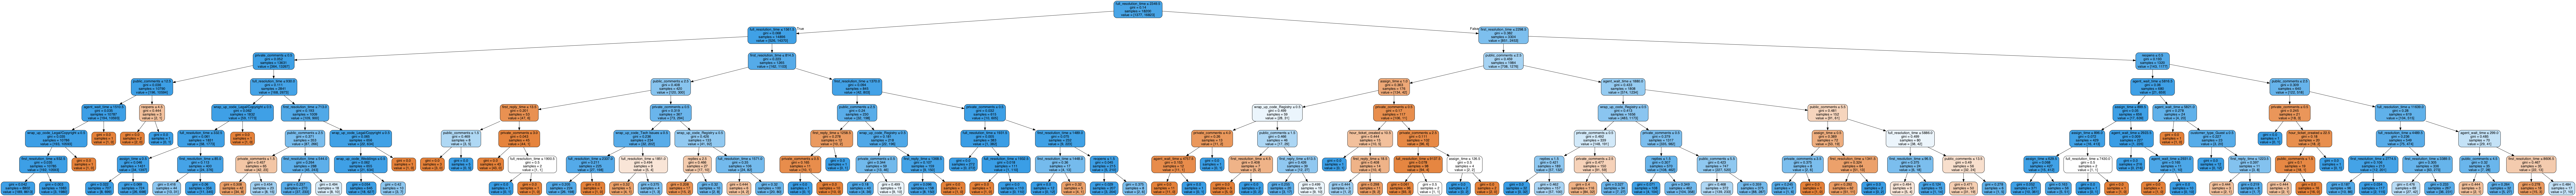

In [49]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(treeclf, out_file=dot_data, feature_names=feature_cols, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# For remaining models, let's scale the data

In [50]:
#scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


# Logistic regressor

##To Do - (1) Can you use polynomial features with a classification problem?
(2) Hide warning messages (3) import reports

In [51]:
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [52]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(X_train_scaled,y_train)

pred_lr = lr.predict(X_test_scaled)

lr.score(X_test, y_test)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.22136146365584308

In [53]:
pipe = make_pipeline(PolynomialFeatures(), LogisticRegression())

In [54]:
params = {'polynomialfeatures__degree': [i for i in range(1, 5)],
         'logisticregression__C': [0.1, 1, 5, 10, 100]}

In [55]:
grid = GridSearchCV(pipe, param_grid=params, cv = 5)

In [56]:
grid.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('logisticregression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'polynomialfeatures__degree': [1, 2, 3, 4], 'logisticregression__C': [0.1, 1, 5, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [58]:
grid.best_estimator_

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=1, include_bias=True, interaction_only=False)), ('logisticregression', LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

In [59]:
best = grid.best_estimator_

In [60]:
best.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=1, include_bias=True, interaction_only=False)), ('logisticregression', LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

In [61]:
pred_lr = best.predict(X_test)

In [65]:
#print(classification_report(pred_lr, y_test))

In [66]:
#precision_score(y, pred_lr)

In [67]:
#recall_score(y, pred_lr)

In [68]:
#f1_score(y, pred_lr)

# KNN classification

##To Do - Fix y again

In [69]:
#knn analysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [70]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [71]:
params = {'n_neighbors': [i for i in range(2, 14)]}

In [72]:
grid = GridSearchCV(KNeighborsClassifier(), param_grid=params, scoring = 'neg_mean_squared_error')

In [73]:
grid.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [74]:
grid.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=13, p=2,
           weights='uniform')

In [75]:
best = grid.best_estimator_

In [ ]:
# Calculate TRAINING ERROR and TESTING ERROR for K=1 through 100.

k_range = list(range(1, 101))
training_error = []
testing_error = []

# Find test accuracy for all values of K between 1 and 100 (inclusive).
for k in k_range:

    # Instantiate the model with the current K value.
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Calculate training error (error = 1 - accuracy).
    y_pred_class = knn.predict(X)
    training_accuracy = metrics.accuracy_score(y, y_pred_class)
    training_error.append(1 - training_accuracy)
    
    # Calculate testing error.
    y_pred_class = knn.predict(X_test)
    testing_accuracy = metrics.accuracy_score(y_test, y_pred_class)
    testing_error.append(1 - testing_accuracy)

In [ ]:
# Create a DataFrame of K, training error, and testing error.
column_dict = {'K': k_range, 'training error':training_error, 'testing error':testing_error}
df = pd.DataFrame(column_dict).set_index('K').sort_index(ascending=False)
df.head()

In [ ]:
# Plot the relationship between K (HIGH TO LOW) and TESTING ERROR.
df.plot(y='testing error');
plt.xlabel('Value of K for KNN');
plt.ylabel('Error (lower is better)');

In [ ]:
# Plot the relationship between K (HIGH TO LOW) and both TRAINING ERROR and TESTING ERROR.
df.plot();
plt.xlabel('Value of K for KNN');
plt.ylabel('Error (lower is better)');

# Feature selection?

In [76]:
from sklearn.feature_selection import SelectKBest

In [77]:
select = SelectKBest(k=10)
select.fit(X_train, y_train)

SelectKBest(k=10, score_func=<function f_classif at 0x123965e18>)

In [78]:
#transform training
X_train_selected = select.transform(X_train)

In [79]:
mask = select.get_support()

In [80]:
print(mask)

[False  True False  True False  True  True  True  True  True  True False
 False False  True False False False False  True False False False]


Text(0.5, 0, 'Sample index')

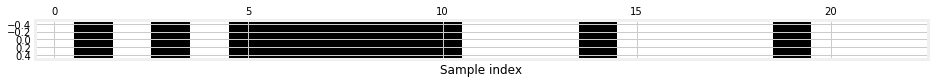

In [81]:
%matplotlib inline
import matplotlib.pyplot as plt
#black is true 
plt.matshow(mask.reshape(1, -1), cmap = 'gray_r')
plt.xlabel('Sample index')

In [82]:
cols = []
for col, val in zip(X.columns, select.get_support()):
    if val == True:
        cols.append(col)

In [83]:
cols

['agent_wait_time',
 'first_reply_time',
 'full_resolution_time',
 'private_comments',
 'public_comments',
 'agent_stations',
 'reopens',
 'replies',
 'wrap_up_code_Legal/Copyright',
 'wrap_up_code_Registry']